In [31]:
import pickle
import pandas as pd
import numpy
import re
import os
import numpy as np
import gensim
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim.models import Doc2Vec

In [32]:
train= pd.read_csv('train.csv',usecols=['text'])

In [33]:
print(train['text'][3])
print(train['text'][4])

1  21  Jammu and Kashmir  Desapani  Armed Assault  Police  Security Patrol  Separatists  Firearms  Firearm
1  24  Jammu and Kashmir  Srinagar  Assassination  Government (General)  Sheikh Ghulam Rasool  Separatists  Firearms  Firearm


In [34]:
LabeledSentence1 = gensim.models.doc2vec.TaggedDocument
all_content_train = []
titles=[]
j=0
for em in train['text'].values:
    all_content_train.append(LabeledSentence1(em,[j]))
    titles.append(j)
    j+=1
print("Number of texts processed: ", j)

Number of texts processed:  10


In [35]:
d2v_model = Doc2Vec(all_content_train, size = 100, window = 10, min_count = 5, workers=7, dm = 1,alpha=0.025, min_alpha=0.001)
# d2v_model.build_vocab(all_content_train)
d2v_model.train(all_content_train, total_examples=d2v_model.corpus_count, epochs=10, start_alpha=0.002, end_alpha=-0.016)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


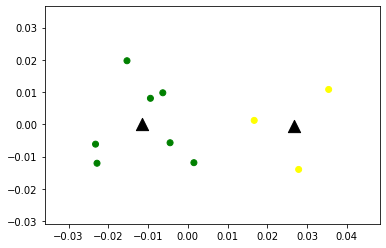

In [36]:
kmeans_model = KMeans(n_clusters=2, init='k-means++', max_iter=100) 
X = kmeans_model.fit(d2v_model.docvecs.vectors_docs )
labels=kmeans_model.labels_.tolist()
l = kmeans_model.fit_predict(d2v_model.docvecs.vectors_docs )
pca = PCA(n_components=2).fit(d2v_model.docvecs.vectors_docs )
datapoint = pca.transform(d2v_model.docvecs.vectors_docs )
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
label1 = ["#FFFF00", "#008000", "#0000FF", "#800080"]
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)
centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker="^", s=150, c="#000000")
plt.show()

In [21]:
test_str='1  21  Jammu and Kashmir  Desapani  Armed Assault  Police  Security Patrol  Separatists  Firearms  Firearm'.split()

similar=d2v_model.docvecs.most_similar([d2v_model.infer_vector(test_str)],topn=3)

In [22]:
print(similar)

[(1, 0.23221534490585327), (0, 0.10884798318147659), (5, 0.09221819788217545)]


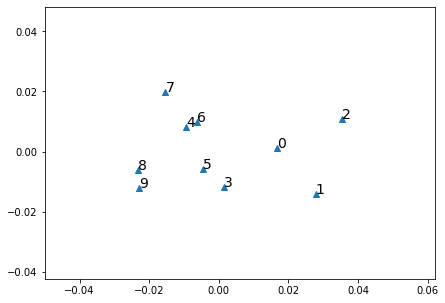

In [44]:
# set up plot
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(figsize=(7, 5)) # set size
ax.margins(0.2)
# ax = Axes3D(fig)

plt.scatter(datapoint[:, 0], datapoint[:, 1],marker="^")
x=datapoint[:, 0]
y=datapoint[:, 1]



# df = pd.DataFrame(dict(x=xs, y=ys, label=cluster, title=titles)) 
for i in range(len(x)):
#     if i==149 or i==3:
#         ax.text(x[i], y[i] ,titles[i],size=50)
#         print(titles[i])
#     else:
        ax.text(x[i], y[i] ,titles[i],size=14)  

In [23]:
#d2v_model.docvecs.vectors_docs[0]


In [24]:
#datapoint

In [36]:
l

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [103]:
datapoint[0][1]


0.0043367995

In [57]:
len(datapoint)

10

In [60]:
dist=[]
for i in range(len(datapoint)):
    dist.append(numpy.linalg.norm(datapoint[3]-datapoint[i]))

In [30]:
from sklearn.metrics.pairwise import cosine_similarity
s1 = d2v_model.infer_vector(train['text'][3].split(), alpha=0.025, min_alpha=0.025, steps=20)
cos=[]
for i in range(len(datapoint)-1):
    s2=d2v_model.infer_vector(train['text'][i+1].split(), alpha=0.025, min_alpha=0.025, steps=20)
    cos.append(cosine_similarity(s1,s2))

ValueError: Expected 2D array, got 1D array instead:
array=[-2.5444697e-03  1.0452992e-03 -9.8591018e-04 -3.9981501e-03
  4.3824078e-03  3.9776387e-03  1.3233823e-03 -7.3305308e-04
  2.2946114e-03  2.1273745e-03  1.5601704e-03  4.8854495e-03
 -3.9207535e-03 -1.2483603e-03  8.5702643e-04 -3.3937441e-03
  2.2424450e-05 -2.4942402e-03  3.3054766e-04 -3.6252083e-04
  5.1529566e-03  2.6595893e-03  7.9403014e-04 -1.6958435e-04
 -1.1400052e-04 -4.6111709e-03  1.1151164e-03 -1.0342225e-03
 -7.5172220e-04 -3.9026618e-03  5.4027298e-03  6.8071015e-05
  1.3491022e-04  5.9225666e-04  3.5000285e-03 -4.3256236e-03
  1.2631798e-03  2.5710247e-03 -3.9594811e-03 -5.6955651e-03
 -7.2216608e-08 -3.6225736e-03 -1.9695049e-03  2.6775878e-03
 -7.7824487e-04  3.6039383e-03  4.7597573e-03 -5.5495366e-03
 -1.9402691e-03  6.2987283e-03  2.3582976e-03 -2.5048335e-05
  5.1617285e-04 -3.6639296e-03  2.0051601e-03 -3.1403853e-03
  4.4607888e-03 -2.7574603e-03  1.5795521e-03  3.1809068e-05
 -1.0885117e-03  2.1953443e-03  3.4425240e-03  2.5238569e-03
  2.9794620e-03 -1.0829717e-03  4.3724716e-04 -3.0944969e-03
  3.0947695e-04 -1.2216350e-03  1.0877709e-03 -4.7319052e-03
 -5.0231428e-03  2.3917763e-03  2.9698929e-03 -9.8701462e-04
  4.8961723e-03 -4.5041866e-03 -2.8873044e-03 -1.1180609e-04
 -1.8110526e-04 -9.9439418e-04  3.6854933e-03  5.2368571e-03
  2.2394978e-03 -2.4619310e-03 -4.4392124e-03 -3.0634378e-03
  4.4391822e-04  2.2545538e-03  2.0606187e-03 -2.1882716e-03
  5.2837003e-03  2.5033813e-03  4.1999635e-03 -1.2431387e-03
 -2.8113541e-03 -1.5426545e-03 -4.1592531e-03  2.8745178e-04].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [61]:
dist

[0.020051127,
 0.026434032,
 0.04080335,
 0.0,
 0.022760868,
 0.008609142,
 0.02304654,
 0.03581762,
 0.025401665,
 0.024374275]

In [62]:
similarity=[]
for i in dist:
    similarity.append(1-i)

In [63]:
similarity

[0.9799488727003336,
 0.9735659677535295,
 0.959196649491787,
 1.0,
 0.9772391319274902,
 0.9913908578455448,
 0.9769534599035978,
 0.9641823805868626,
 0.9745983351022005,
 0.9756257254630327]